In [19]:
!pip install yfinance
!pip install mpl_finance
!pip install stockstats
!pip install get-all-tickers
!pip install Yahoo-ticker-downloader

In [20]:
from google.colab import drive
drive.mount('/content/drive/')
#change this path to the shared folder dir
root_folder0="/content/drive/My Drive/Maestría/Sapienza/Semester 3/Data_Mining/Data_Mining_Final_Project"
DB_path_basic="Db/DataSet_basic_all_tickers.csv"
DB_path="Db/DataSet_all_tickers.csv"
%cd $root_folder0
!pwd
!ls
#flat to decide if isntalll or not the libraries
install_libraries=True

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Maestría/Sapienza/Semester 3/Data_Mining/Data_Mining_Final_Project
/content/drive/My Drive/Maestría/Sapienza/Semester 3/Data_Mining/Data_Mining_Final_Project
Data  loading_data_tes.py  technical_indicators2.ipynb
Db    Papers		   technical_indicators.ipynb


In [21]:
import yfinance as yf
import pandas_datareader as pdr
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# top_tickers=pdr.get_tops_iex().head(10000)
# #searching some important companies, in this case Apple
# for ind,ticker in enumerate(top_tickers.symbol):
#   if ticker =="AAPL":
#     print(str(ind)+" "+ticker)

In [23]:
top_tickers

""


In [24]:
# # !pip install iexfinance
# from iexfinance.refdata import get_iex_symbols

# # tickers=pdr.get_iex_symbols()
# tickers=pdr.get_nasdaq_symbols()
# len(tickers)


In [25]:
import numpy as np
#adding manually the first 100 important tickers in the world
tickers=["ATVI","ADBE","AMD","ALXN","ALGN","GOOGL","GOOG","AMZN","AEP","AMGN","ADI","ANSS","AAPL","AMAT","ASML","TEAM","ADSK","ADP","BIDU","BIIB","BKNG","AVGO","CDNS","CDW","CERN","CHTR","CHKP","CTAS","CSCO","CTSH","CMCSA","CPRT","COST","CSX","DXCM","DOCU","DLTR","EBAY","EA","EXC","FB","FAST","FISV","FOXA","FOX","GILD","IDXX","ILMN","INCY","INTC","INTU","ISRG","JD","KDP","KLAC","KHC","LRCX","LULU","MAR","MRVL","MTCH","MXIM","MELI","MCHP","MU","MSFT","MRNA","MDLZ","MNST","NTES","NFLX","NVDA","NXPI","ORLY","OKTA","PCAR","PAYX","PYPL","PTON","PEP","PDD","QCOM","REGN","ROST","SGEN","SIRI","SWKS","SPLK","SBUX","SNPS","TMUS","TSLA","TXN","TCOM","VRSN","VRSK","VRTX","WBA","WDAY","XEL","XLNX","ZM"]
# new_tickers=np.unique(tickers.index.values)

In [26]:
len(tickers)

102

In [27]:
#if we want to update the dataset
update_DB=True
#creating/verifying folders
!mkdir -p Db/

#
# import tickers stock prices
if update_DB:
  df0 = pdr.get_data_yahoo(tickers, start="2005-01-01", end="2021-12-31")
  df0.columns=df0.columns.swaplevel(0, 1)#interchanging the header, given by default
  df0.to_csv(DB_path_basic,sep='\t',index=True)



In [28]:
df0.head()

Symbols,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,AMAT,ASML,TEAM,ADSK,ADP,BIDU,BIIB,BKNG,AVGO,CDNS,CDW,CERN,CHTR,CHKP,CTAS,CSCO,CTSH,CMCSA,CPRT,COST,CSX,DXCM,DOCU,DLTR,EBAY,EA,EXC,...,MELI,MCHP,MU,MSFT,MRNA,MDLZ,MNST,NTES,NFLX,NVDA,NXPI,ORLY,OKTA,PCAR,PAYX,PYPL,PTON,PEP,PDD,QCOM,REGN,ROST,SGEN,SIRI,SWKS,SPLK,SBUX,SNPS,TMUS,TSLA,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM
Attributes,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,...,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-03,4.947652,30.838949,21.410000,6.0925,10.56,101.456459,100.976517,44.520000,17.882706,51.244274,24.491219,16.125000,0.974950,12.723049,11.298233,NaN,37.410706,23.501596,NaN,66.290001,23.730000,NaN,13.75,NaN,6.431165,NaN,24.850000,34.097183,14.448113,10.017122,8.609766,6.2650,34.065117,4.983247,NaN,NaN,9.513333,23.320475,60.798985,23.239546,...,NaN,2332900.0,6698700.0,65002900.0,NaN,1174300.0,8529600.0,16206000.0,11334400.0,26667900.0,NaN,797200.0,NaN,2929500.0,2383800.0,NaN,NaN,3513100.0,NaN,13651100.0,235900.0,6026000.0,240800.0,92827000.0,5185400.0,NaN,22233600.0,1935700.0,NaN,NaN,9305500.0,3155200.0,5677000.0,NaN,776900.0,9757800.0,NaN,879200.0,6173400.0,NaN
2005-01-04,4.819108,30.024111,20.209999,5.8600,10.41,97.347343,96.886841,42.139999,17.814369,50.431149,23.824934,16.200001,0.984962,12.480994,10.924736,NaN,34.981960,23.126425,NaN,64.760002,23.879999,NaN,13.30,NaN,6.341588,NaN,24.049999,33.615269,13.879755,9.904570,8.389743,6.0350,33.453506,4.875622,NaN,NaN,9.210000,22.748241,59.061298,23.083639,...,NaN,2681400.0,7710000.0,109442100.0,NaN,1183200.0,11721600.0,12838000.0,17352300.0,19755600.0,NaN,706200.0,NaN,4134100.0,1628300.0,NaN,NaN,3295400.0,NaN,18800300.0,403400.0,5366800.0,140600.0,80146200.0,7382300.0,NaN,15898800.0,3051200.0,NaN,NaN,12968100.0,1841600.0,6700700.0,NaN,908300.0,6618200.0,NaN,1220300.0,8058800.0,NaN
2005-01-05,4.889680,29.859142,19.750000,5.8425,10.40,96.851852,96.393692,41.770000,17.604113,49.633934,23.932623,16.200001,0.993589,12.269195,10.766720,NaN,35.251820,23.029953,NaN,64.839996,23.590000,NaN,13.31,NaN,6.222560,NaN,24.180000,33.528374,13.887231,9.813569,8.468322,5.9050,33.581524,4.856851,NaN,NaN,9.433333,22.664452,59.630543,22.739594,...,NaN,3260600.0,5512800.0,72463500.0,NaN,881900.0,13324800.0,16800000.0,12732300.0,18120300.0,NaN,414400.0,NaN,6375700.0,1232300.0,NaN,NaN,3450900.0,NaN,13725000.0,293300.0,2669600.0,101300.0,105003600.0,3787000.0,NaN,17782800.0,2055100.0,NaN,NaN,17913300.0,3908800.0,4217800.0,NaN,1063200.0,6850200.0,NaN,1430000.0,18789100.0,NaN
2005-01-06,4.821629,29.364239,19.719999,6.0000,10.24,94.369370,93.922951,41.049999,17.609365,50.096310,23.892233,15.720000,0.994359,12.178426,10.594337,NaN,35.081905,22.874525,NaN,65.190002,24.180000,NaN,13.34,NaN,6.136664,NaN,23.209999,33.852268,14.096630,9.696231,8.455222,5.8925,34.065117,4.915667,NaN,NaN,9.366667,21.699831,58.332272,22.825603,...,NaN,2451800.0,7517400.0,76890500.0,NaN,847600.0,7540800.0,15280000.0,8273300.0,14089200.0,NaN,330000.0,NaN,3856000.0,1805600.0,NaN,NaN,2961200.0,NaN,14199100.0,222500.0,15237600.0,126800.0,89997800.0,2693200.0,NaN,39010400.0,1755900.0,NaN,NaN,11317200.0,2187200.0,3596900.0,NaN,1108000.0,4816400.0,NaN,1019200.0,14051600.0,NaN
2005-01-07,4.660319,29.384233,19.920000,5.9325,10.28,97.022018,96.563057,42.320000,17.541035,50.199940,2

In [29]:
#feature extraction
def Feature_Extraction(raw_df): 
    stock = StockDataFrame.retype(raw_df)
    #volume delta against previous day
    stock['volume_delta']

    # open delta against next 2 day
    # stock['open_2_d']

    # open price change (in percent) between today and the day before yesterday
    # 'r' stands for rate.
    stock['open_-2_r']

    # CR indicator, including 5, 10, 20 days moving average
    stock['cr']
    stock['cr-ma1']
    stock['cr-ma2']
    stock['cr-ma3']

    # # volume max of three days ago, yesterday and two days later
    # stock['volume_-3,2,-1_max']

    # # volume min between 3 days ago and tomorrow
    # stock['volume_-3~1_min']

    # KDJ, default to 9 days
    stock['kdjk']
    stock['kdjd']
    stock['kdjj']

    # # three days KDJK cross up 3 days KDJD
    # stock['kdj_3_xu_kdjd_3']

    # 2 days simple moving average on open price
    stock['open_2_sma']

    # MACD
    stock["macd"]
    # MACD signal line
    stock['macds']
    # MACD histogram
    stock['macdh']

    # bolling, including upper band and lower band
    stock['boll']
    stock['boll_ub']
    stock['boll_lb']

    # close price less than 10.0 in 5 days count
    stock['close_10.0_le_5_c']

    # CR MA2 cross up CR MA1 in 20 days count
    stock['cr-ma2_xu_cr-ma1_20_c']

    # count forward(future) where close price is larger than 10
    stock['close_10.0_ge_5_fc']

    # 6 days RSI
    stock['rsi_6']
    # 12 days RSI
    stock['rsi_12']

    # 10 days WR
    stock['wr_10']
    # 6 days WR
    stock['wr_6']

    # CCI, default to 14 days
    stock['cci']
    # 20 days CCI
    stock['cci_20']

    # TR (true range)
    stock['tr']
    # ATR (Average True Range)
    stock['atr']

    # DMA, difference of 10 and 50 moving average
    stock['dma']

    # DMI
    # +DI, default to 14 days
    stock['pdi']
    # -DI, default to 14 days
    stock['mdi']
    # DX, default to 14 days of +DI and -DI
    stock['dx']
    # ADX, 6 days SMA of DX, same as stock['dx_6_ema']
    stock['adx']
    # ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
    stock['adxr']

    # TRIX, default to 12 days
    stock['trix']
        # TRIX based on the close price for a window of 3
    stock['close_3_trix']
    # MATRIX is the simple moving average of TRIX
    stock['trix_9_sma']
    # TEMA, another implementation for triple ema
    stock['tema']
        # TEMA based on the close price for a window of 2
    stock['close_2_tema']

    # VR, default to 26 days
    stock['vr']
    # MAVR is the simple moving average of VR
    stock['vr_6_sma']

    stock["macd"] 
    stock["macds"]
    l_pd=pd.DataFrame(stock)
    
    l_pd.columns=l_pd.columns.set_names(['Atributes'])
    return l_pd

In [30]:
from stockstats import StockDataFrame
from datetime import date
# stock = StockDataFrame.retype(df_aapl[["Open", "Close", "High", "Low", "Volume"]])
num_years=5
process_DS=False
if process_DS:
  DB_path_basic
  df1= pd.read_csv(DB_path_basic, sep='\t',header=[0,1], index_col=0)
  df1.index = pd.to_datetime(df1.index)
  value_to_check = pd.Timestamp(date.today().year-num_years-1,1,1)
  df1=df1[df1.index>= value_to_check]
  #deleting rows with null values
  # df1=df1.dropna()
  #buffer to store and process the tickers data
  # df1.index.name
  
  buff_Tickers=[]
  Tickers_DF=pd.DataFrame()
  tickers_names=df1.columns.get_level_values('Symbols').unique()#[:2]
  new_tickers_name=[]
  # print(tickers_names)
  for ticker_name in tickers_names:
    # print(df1[ticker_name])
    # bn=df1[ticker_name].columns
    # print(bn)
    temp_df=df1[ticker_name].dropna()
    if len(temp_df)>=(num_years*316*0.9):
      temp_pd=Feature_Extraction(df1[ticker_name])
      buff_Tickers.append(temp_pd)
      new_tickers_name.append(ticker_name)
  #concat all tickers dataframes already processed
  # pdtin=pd.MultiIndex.from_arrays([new_tickers_name],names=('Symbols'))
  pdtin=pd.Index(new_tickers_name,dtype='object',name='Symbols')
  # pdtin=pdtin.set_names(['Symbols'])
  Tickers_DF=pd.concat(buff_Tickers,keys=pdtin,axis=1)
  #pay attention to this because can delete important rows, if there is an error is here.
  Tickers_DF=Tickers_DF.dropna()
  Tickers_DF.to_csv(DB_path,sep='\t',index=True)
else:
  Tickers_DF= pd.read_csv(DB_path, sep='\t',header=[0,1], index_col=0)
  print("DataSet Loaded")
# df1.columns

Index(['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AEP',
       'AMGN',
       ...
       'TXN', 'TCOM', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'XEL', 'XLNX',
       'ZM'],
      dtype='object', name='Symbols', length=102)


In [39]:
len(new_tickers_name)

91

In [31]:
Tickers_DF.head(100)

Symbols          ATVI                        ...      XLNX                        
Atributes   adj close      close       high  ...    change          vr    vr_6_sma
Date                                         ...                                  
2015-01-20  19.347851  20.219999  20.340000  ... -0.388161   31.604860   32.207252
2015-01-21  19.233032  20.100000  20.180000  ...  1.095950   50.626788   32.464639
2015-01-22  19.701893  20.590000  20.600000  ... -6.143096   29.698681   31.890913
2015-01-23  19.759308  20.650000  20.830000  ...  0.821354   38.375717   34.377971
2015-01-26  19.941111  20.840000  20.870001  ... -0.738282   35.403690   37.017611
...               ...        ...        ...  ...       ...         ...         ...
2015-06-05  24.910866  25.770000  25.830000  ...  0.169460  182.155635  217.398967
2015-06-08  24.591869  25.440001  25.780001  ... -2.030026  157.486200  211.106770
2015-06-09  24.669199  25.520000  25.879999  ...  0.259009  157.235076  193.050233
2015-06-10  24.649868  25.500000  25.600000  ...  1.184067  156.974420  175.719738
2015-06-11  24.456533  25.299999  25.389999  ...  0.468088  172.769030  167.828453

[100 rows x 7371 columns]

In [32]:
#by company
Tickers_DF["ATVI"].head()

Atributes,adj close,close,high,low,open,volume,volume_delta,open_-2_r,middle,cr,cr-ma1,cr-ma2,cr-ma3,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,open_2_sma,macd,macds,macdh,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_10.0_le,close_10.0_le_5_c,cr-ma1_20_c,cr-ma2_xu_cr-ma1_20_c,close_10.0_ge,close_10.0_ge_5_fc,close_-1_s,close_-1_d,rs_6,rsi_6,rs_12,...,wr_10,wr_6,middle_14_sma,cci,middle_20_sma,cci_20,tr,atr,close_10_sma,close_50_sma,dma,high_delta,um,low_delta,dm,pdm,pdm_14_ema,pdm_14,atr_14,pdi_14,pdi,mdm,mdm_14_ema,mdm_14,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,close_3_trix,trix_9_sma,tema,close_2_tema,change,vr,vr_6_sma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-20,19.347851,20.219999,20.340000,19.799999,20.340000,8545300.0,-10724300.0,7.562138,20.120000,87.599659,29.084749,18.620728,10.904891,93.717233,59.238994,59.238994,37.007527,37.007527,103.701927,103.701927,19.980,0.040705,-0.037521,0.078226,19.336666,0.633695,19.336666,20.604057,18.069276,False,0.0,12.0,False,True,5.0,20.250000,-0.030001,2.140991,68.162919,1.508537,...,6.282767,6.282767,19.374444,100.599659,19.374444,100.599659,0.540001,0.692149,19.206,19.336666,-0.130667,0.040001,0.040001,0.219999,0.0,0.040001,0.189602,0.189602,0.692149,27.393180,27.393180,0.0,0.113384,0.113384,16.381510,16.381510,25.155335,25.155335,62.069832,62.069832,84.151944,84.151944,-0.203677,1.248953,-0.310897,20.210178,20.280982,-0.148152,69.348875,53.484696
2015-01-21,19.233032,20.100000,20.180000,19.930000,20.110001,7115500.0,-1429800.0,2.497450,20.070000,84.907297,31.431151,20.269752,11.585986,87.434566,68.637518,68.637518,47.550858,47.550858,110.810839,110.810839,20.225,0.076680,-0.013352,0.090032,19.395384,0.642594,19.395384,20.680572,18.110197,False,0.0,13.0,False,True,5.0,20.219999,-0.119999,1.809651,64.408392,1.369598,...,12.565434,12.565434,19.427949,83.325702,19.427949,83.325702,0.289999,0.643385,19.268,19.395384,-0.127385,-0.160000,0.000000,0.130001,0.0,0.000000,0.159662,0.159662,0.643385,24.815970,24.815970,0.0,0.095480,0.095480,14.840302,14.840302,25.155335,25.155335,51.333458,51.333458,74.606873,74.606873,-0.131254,1.242242,-0.288935,20.284035,20.124725,-0.593467,62.626023,57.368492
2015-01-22,19.701893,20.590000,20.600000,20.049999,20.160000,7917100.0,801600.0,-0.884957,20.413333,97.818821,43.507094,22.522713,15.628644,99.539160,78.938065,78.938065,58.013260,58.013260,120.787676,120.787676,20.135,0.131011,0.016849,0.114162,19.480714,0.695054,19.480714,20.870821,18.090607,False,0.0,14.0,False,True,5.0,20.100000,0.490000,2.567983,71.972958,1.779874,...,0.460840,0.480780,19.498333,111.439753,19.498333,111.439753,0.550001,0.632598,19.421,19.480714,-0.059714,0.420000,0.420000,0.119999,0.0,0.420000,0.199785,0.199785,0.632598,31.581718,31.581718,0.0,0.080765,0.080765,12.767149,12.767149,42.424012,42.424012,48.755422,48.755422,67.126499,67.126499,-0.052979,1.317503,-0.258865,20.616708,20.565859,2.437810,73.412381,63.872579
2015-01-23,19.759308,20.650000,20.830000,20.520000,20.590000,5914300.0,-2002800.0,2.386870,20.666667,108.305403,56.154582,24.407815,17.472430,92.499986,83.458706,83.458706,66.495075,66.495075,117.385966,117.385966,20.375,0.173873,0.049399,0.124474,19.558666,0.734671,19.558666,21.028008,18.089325,False,0.0,15.0,False,True,5.0,20.590000,0.059999,2.679410,72.821730,1.834678,...,7.500014,7.792223,19.536429,128.697305,19.576222,124.568445,0.309999,0.596910,19.561,19.558666,0.002333,0.230000,0.230000,0.470001,0.0,0.230000,0.204347,0.204347,0.596910,34.234179,34.234179,0.0,0.068571,0.068571,11.487625,11.487625,49.749906,49.749906,49.042140,49.042140,61.912618,61.912618,0.022976,1.230532,-0.219827,20.762473,20.658394,0.291401,81.470098,68.784743
2015-01-26,19.941111,20.840000,20.870001,20.520000,20.650000,5989800.0,75500.0,2.430554,20.743334,109.385179,67.103261,30.489762,18.620728,98.770464,88.562625,88.562625,73.850925,73.850925,117.986025,117.986025,20.620,0.215735,0.083630,0.132105,19.638750,0.7786

In [38]:
Tickers_DF["TSLA"].head()

Atributes,adj close,close,high,low,open,volume,volume_delta,open_-2_r,middle,cr,cr-ma1,cr-ma2,cr-ma3,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,open_2_sma,macd,macds,macdh,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_10.0_le,close_10.0_le_5_c,cr-ma1_20_c,cr-ma2_xu_cr-ma1_20_c,close_10.0_ge,close_10.0_ge_5_fc,close_-1_s,close_-1_d,rs_6,rsi_6,rs_12,...,wr_10,wr_6,middle_14_sma,cci,middle_20_sma,cci_20,tr,atr,close_10_sma,close_50_sma,dma,high_delta,um,low_delta,dm,pdm,pdm_14_ema,pdm_14,atr_14,pdi_14,pdi,mdm,mdm_14_ema,mdm_14,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,close_3_trix,trix_9_sma,tema,close_2_tema,change,vr,vr_6_sma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-20,38.386002,38.386002,38.824001,37.408001,38.773998,22516000.0,4500000.0,-0.318784,38.206001,37.064820,36.645786,28.407671,7.978721,23.270673,23.448362,23.448362,24.178665,24.178665,21.987755,21.987755,38.456999,-0.477513,-0.298726,-0.178787,40.748833,1.874585,40.748833,44.498004,36.999663,False,0.0,11.0,False,True,5.0,38.613998,-0.227997,0.168119,14.392255,0.152916,...,76.729327,69.349806,40.723944,-102.386062,40.723944,-102.386062,1.416000,1.578836,40.3106,40.748833,-0.438233,-0.073997,0.000000,-0.521999,0.521999,0.000000,0.077007,0.077007,1.578836,4.877424,4.877424,0.521999,0.665471,0.665471,42.149439,42.149439,79.256860,79.256860,78.771807,78.771807,81.527816,81.527816,-0.460184,-1.132136,-0.348015,38.171331,38.407297,-0.590451,32.842985,34.069765
2015-01-21,39.313999,39.313999,39.736000,37.902000,37.910000,20765000.0,-1751000.0,-0.603040,38.984000,47.809157,34.251999,30.478685,19.354874,40.173609,29.023444,29.023444,25.793592,25.793592,35.483149,35.483149,38.341999,-0.450390,-0.330823,-0.119567,40.638461,1.838368,40.638461,44.315197,36.961726,False,0.0,12.0,False,True,5.0,38.386002,0.927998,0.590842,37.140194,0.403885,...,61.148444,48.827963,40.590103,-64.598218,40.590103,-64.598218,1.834000,1.609777,40.0164,40.638461,-0.622062,0.911999,0.911999,0.493999,0.000000,0.911999,0.208858,0.208858,1.609777,12.974349,12.974349,0.000000,0.560388,0.560388,34.811510,34.811510,45.697955,45.697955,69.152464,69.152464,77.928514,77.928514,-0.471132,-0.571544,-0.360434,38.856181,39.285086,2.417542,42.353033,36.469035
2015-01-22,40.324001,40.324001,40.647999,39.040001,39.400002,20584500.0,-180500.0,1.614492,40.004000,60.423490,34.485642,30.161694,26.504235,66.533274,41.526721,41.526721,31.037968,31.037968,62.504227,62.504227,38.655001,-0.365702,-0.338120,-0.027582,40.616000,1.768245,40.616000,44.152490,37.079510,False,0.0,13.0,False,True,5.0,39.313999,1.010002,1.142935,53.335033,0.701864,...,42.291627,8.881513,40.548238,-22.949097,40.548238,-22.949097,1.607998,1.609572,39.8298,40.616000,-0.786200,0.911999,0.911999,1.138000,0.000000,0.911999,0.317226,0.317226,1.609572,19.708739,19.708739,0.000000,0.474021,0.474021,29.450114,29.450114,19.816116,19.816116,54.876502,54.876502,71.258186,71.258186,-0.456396,0.147215,-0.378369,39.906256,40.326377,2.569065,51.780415,37.107915
2015-01-23,40.257999,40.257999,40.700001,39.666000,40.057999,17193000.0,-3391500.0,5.666048,40.208000,64.058325,36.283938,30.808548,28.474537,72.047764,51.700402,51.700402,37.925446,37.925446,79.250314,79.250314,39.729000,-0.301086,-0.330443,0.029357,40.592133,1.706429,40.592133,44.004991,37.179276,False,0.0,14.0,False,True,5.0,40.324001,-0.066002,1.095506,52.278836,0.687264,...,34.787821,13.426530,40.297286,-4.387034,40.525556,-14.144029,1.034000,1.545898,39.6432,40.592133,-0.948933,0.052002,0.052002,0.625999,0.000000,0.052002,0.277182,0.277182,1.545898,17.930184,17.930184,0.000000,0.402452,0.402452,26.033566,26.033566,18.431963,18.431963,44.369219,44.369219,63.505858,63.505858,-0.428261,0.486147,-0.395260,40.310628,40.313691,-0.163679,48.000773,39.835961
2015-01-26,41.310001,41.310001,41.723999,40.209999,40.366001,16172500.0,-1020500.0,2.451776,41.081333,75.263597,37.264815,31.480090,28.407671,91.236288,64.879031,64.879031,46.909974,46.909974

In [33]:
#each attribute $in lower case, sorry xD
Tickers_DF["ATVI","close"]

Date
2015-01-20    20.219999
2015-01-21    20.100000
2015-01-22    20.590000
2015-01-23    20.650000
2015-01-26    20.840000
                ...    
2021-01-11    90.910004
2021-01-12    89.250000
2021-01-13    89.769997
2021-01-14    89.989998
2021-01-15    90.690002
Name: (ATVI, close), Length: 1510, dtype: float64

In [34]:
# Tickers_DF.xs('TSLA',level='Atributes',axis=1)
# df.xs('Symbols',level='TSLA',axis=1)


In [35]:
# # df_spy.head()
# df=df_aapl.tail(20)
# df_size=df.size
# columns=df_aapl.head(1).columns
# for num,(val,ticker) in enumerate(columns):
#   print(val)
#   print(ticker)

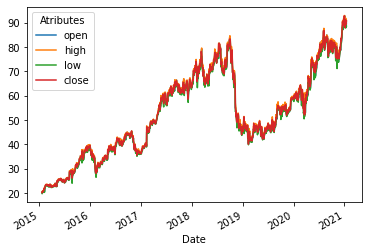

In [36]:
# df1.xs('TSLA',level='Symbols',axis=1)[["Open", "High", "Low", "Close"]].plot()

Tickers_DF["ATVI"][map(str.lower,["Open", "High", "Low", "Close"])].plot()
plt.show()